<a href="https://colab.research.google.com/github/Sikandarh11/Machine-Learning-Projects/blob/main/Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
ds = df.iloc[:, 2:]

In [ ]:
ds.sample(5)

,Age,EstimatedSalary,Purchased
105,21,72000,0
184,33,60000,0
364,42,104000,1
20,45,22000,1
30,31,74000,0


In [ ]:
x = ds.iloc[:, :2]
y = ds.iloc[:, 2:]

In [ ]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
#using Standard Scaler of Scikit learn
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x_train)
x_train_s = scale.transform(x_train)
x_test_s = scale.transform(x_test)

In [ ]:
x_train_s = pd.DataFrame(x_train_s, columns = x_train.columns)
x_test_s = pd.DataFrame(x_test_s, columns = x_test.columns)

In [ ]:
x_train_s.head()

,Age,EstimatedSalary
0,-0.803301,-1.191218
1,0.756980,-1.368598
2,0.854498,1.439920
3,-0.510748,-1.486851
4,-1.485924,0.375639


# **Making Standard Scaler**

**1. Standard Daviation**

In [ ]:
def population_std_dev(data):
    n = len(data)
    if n == 0:
        raise ValueError('The data list is empty.')
    mean = sum(data) / n
    squared_diff = sum((x-mean)**2 for x in data)
    population_variance = squared_diff / n
    population_std_dev = population_variance ** 0.5
    return population_std_dev


**Checking Results of Standard Daviation**

In [ ]:
import statistics

print(statistics.pstdev(np.array(x_train['Age'])))

10.246950765959598


In [ ]:
population_std_dev(np.array(x_train['Age']))

10.254564532441153

# **2. Standard Scalar**

In [ ]:
def standard_scaler(data):
  mean = sum(data)/len(data)
  sd = population_std_dev(data)
  d = []
  for i in range(len(data)):
    d.append(((data[i]-mean)/sd))
  return d


In [ ]:
x_train_a  = np.array(standard_scaler(np.array(x_train['Age']))).reshape(-1, 1)
es = np.array(standard_scaler(np.array(x_train['EstimatedSalary']))).reshape(-1, 1)

In [ ]:
x_train_ma = np.concatenate((x_train_a, es), axis = 1)

In [ ]:
x_train_ma =  pd.DataFrame(x_train_ma, columns = x_train.columns)

# **Comparing Results**

In [ ]:
x_train_ma.head(5)

,Age,EstimatedSalary
0,-0.803301,-1.191218
1,0.756980,-1.368598
2,0.854498,1.439920
3,-0.510748,-1.486851
4,-1.485924,0.375639


In [ ]:
x_train_s.head()

,Age,EstimatedSalary
0,-0.803301,-1.191218
1,0.756980,-1.368598
2,0.854498,1.439920
3,-0.510748,-1.486851
4,-1.485924,0.375639


# **Visualizing effects of Scalling**

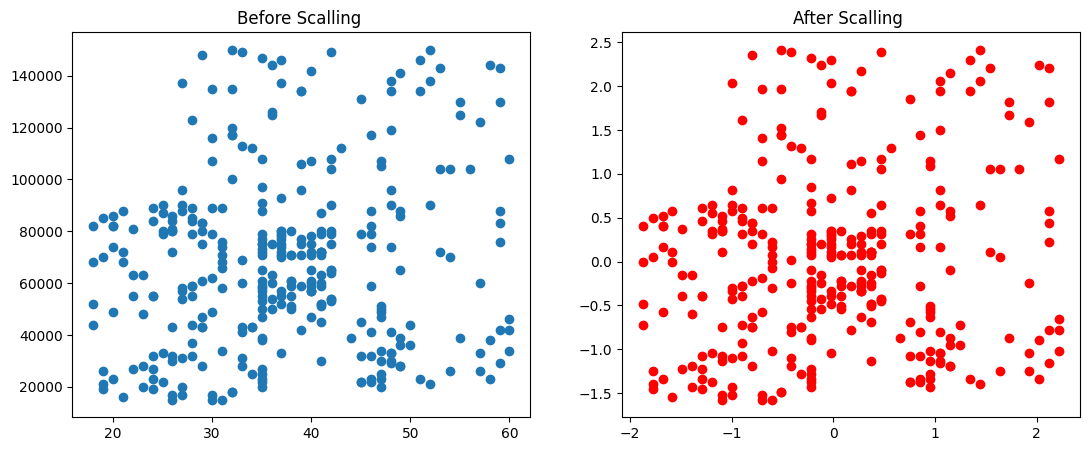

In [ ]:
fig, (ax1 ,ax2) = plt.subplots(ncols = 2, figsize = (13,5))
ax1.set_title("Before Scalling ")
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax2.set_title("After Scalling ")
ax2.scatter(x_train_s['Age'], x_train_s['EstimatedSalary'], c = "red")
plt.show()

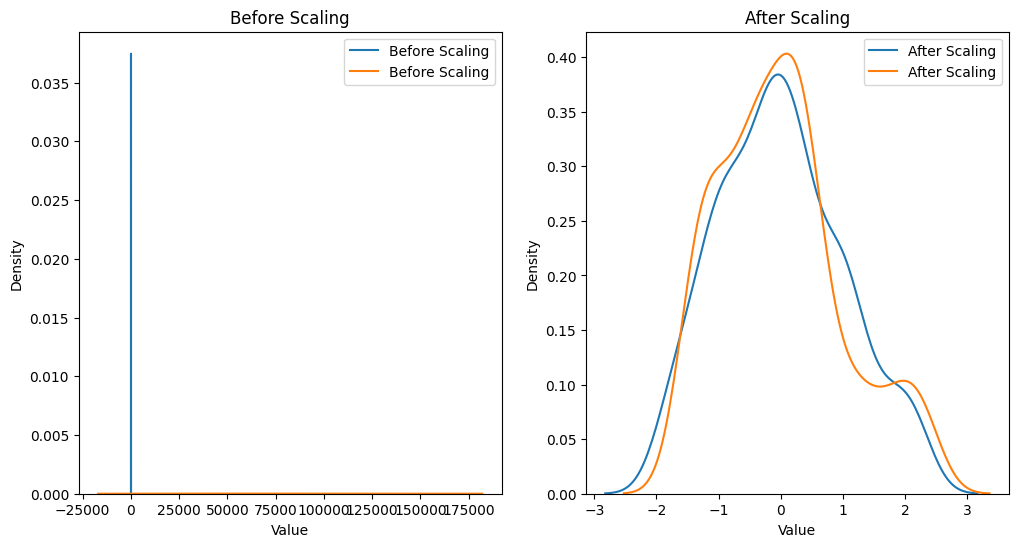

In [ ]:
# Original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(x_train['Age'], label='Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], label='Before Scaling')
plt.title('Before Scaling')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Scaled data
plt.subplot(1, 2, 2)
sns.kdeplot(x_train_s['Age'], label='After Scaling')
sns.kdeplot(x_train_s['EstimatedSalary'], label='After Scaling')
plt.title('After Scaling')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.show()


Since there will be no effect Graphically

# **Applying Logistic Regresion on before and after Scaling**

In [ ]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
m1pred = model1.predict(x_test)
beforeScale = accuracy_score(m1pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model2 = LogisticRegression()
model2.fit(x_train_s, y_train)
m2pred = model2.predict(x_test_s)
afterScale = accuracy_score(m2pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Accuracy Score Before Scaling**

In [ ]:
beforeScale

0.6

**After Scaling**

In [ ]:
afterScale

0.8375

The goal here is not to build a good model, the goal is to check the improvement in the model by applying the method of **Feature Scaling**

# **2. Normalization**

In [ ]:
def min_max_scaler(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    scaled_data = (data - min_vals) / (max_vals - min_vals)
    return scaled_data

In [ ]:
X_scaledm = min_max_scaler(np.array(x_train['EstimatedSalary']).reshape(-1,1))
X_scaled = min_max_scaler(np.array(x_train['Age']).reshape(-1,1))

In [ ]:
norm_scaled = np.concatenate((X_scaled, X_scaledm), axis = 1)

In [ ]:
norm_scaled = pd.DataFrame(norm_scaled, columns = x_train.columns)

In [ ]:
norm_scaled.head()

,Age,EstimatedSalary
0,0.261905,0.096296
1,0.642857,0.051852
2,0.666667,0.755556
3,0.333333,0.022222
4,0.095238,0.488889


# **Using Sklearn**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
sk_norm = scaler.transform(x_train)

In [ ]:
sk_norm = pd.DataFrame(sk_norm, columns = x_train.columns)

In [ ]:
sk_norm.head()

,Age,EstimatedSalary
0,0.261905,0.096296
1,0.642857,0.051852
2,0.666667,0.755556
3,0.333333,0.022222
4,0.095238,0.488889


# **Robust Scalling**

**Using Sklearn**

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(x_train)
scaled_rs = transformer.transform(x_train)

In [ ]:
scaled_rs = pd.DataFrame(scaled_rs, columns = x_train.columns)

In [ ]:
scaled_rs.head()

,Age,EstimatedSalary
0,-0.5000,-0.875740
1,0.5000,-1.017751
2,0.5625,1.230769
3,-0.3125,-1.112426
4,-0.9375,0.378698


**Writing Code**

In [ ]:
def robust_scaler(data):
    center = np.median(data, axis=0)
    q25, q75 = np.percentile(data, [25, 75], axis=0)
    scale = q75 - q25
    scale[scale == 0] = 1  #just replacing 1 if we got zero
    scaled_data = (data - center) / scale
    return scaled_data

In [ ]:
col_b = robust_scaler(np.array(x_train['EstimatedSalary']).reshape(-1,1))
col_a = robust_scaler(np.array(x_train['Age']).reshape(-1,1))

In [ ]:
arr2d = np.concatenate((col_a, col_b), axis = 1)
scaledRS = pd.DataFrame(arr2d, columns = x_train.columns)

In [ ]:
scaledRS.head()

,Age,EstimatedSalary
0,-0.5000,-0.875740
1,0.5000,-1.017751
2,0.5625,1.230769
3,-0.3125,-1.112426
4,-0.9375,0.378698
